### Task # 16:
- This is Task # 16 overall, but task 1 of Week 7
### Task # 01:

- **In this Task we will be working with the iris dataset**

In [39]:
#importing commonly used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore the specific UserWarning related to KMeans
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")


### 1.1):

In [40]:
#importing the dataset
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [49]:
from sklearn.cluster import KMeans

# Perform K-Means clustering with k=3
kmeans = KMeans(n_clusters=3,random_state=42)
X = iris_df.iloc[:, :-1]# we only take the first two features.
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

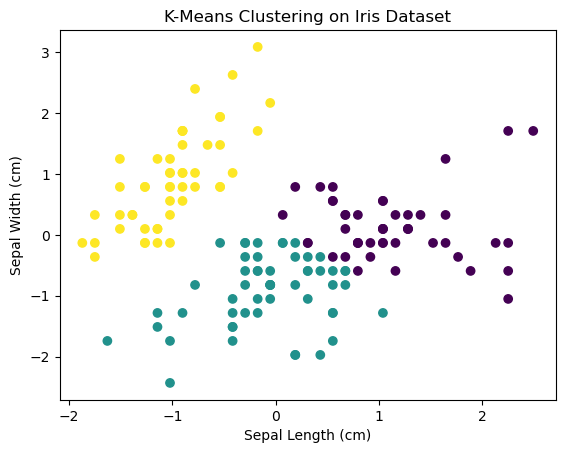

In [43]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering on Iris Dataset')
plt.show()

### 1.2)

In [44]:
from sklearn.metrics import silhouette_score

X = iris_df

# Define the range of cluster numbers to test
n_clusters_range = range(2, 11)

# Initialize lists to store scores
silhouette_scores = []
elbow_scores = []

# Loop through each cluster number
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    elbow_scores.append(kmeans.inertia_)

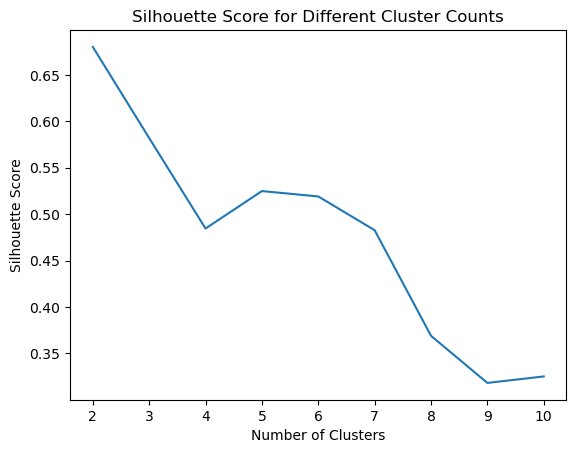

In [45]:
# Plot the Silhouette Score for different cluster counts
plt.plot(n_clusters_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Counts')
plt.show()

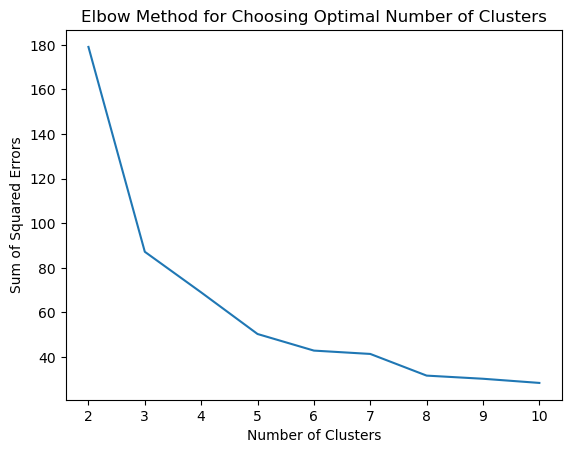

In [46]:
# Plot the Elbow Method
plt.plot(n_clusters_range, elbow_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Choosing Optimal Number of Clusters')
plt.show()

### 1.3):

In [50]:
from sklearn.decomposition import PCA

X = iris_df

# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform K-Means clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

KMeans(n_clusters=3)

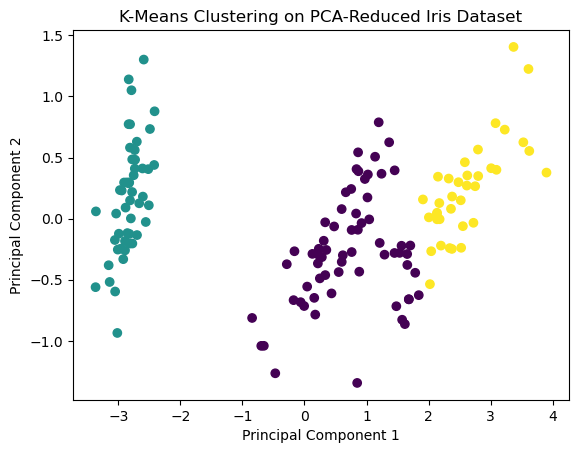

In [51]:
# Plot the clusters in the PCA-reduced space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Iris Dataset')
plt.show()

### 1.4)

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

X = iris_df

# Perform hierarchical clustering using Ward's linkage
Z = linkage(X, method='ward')

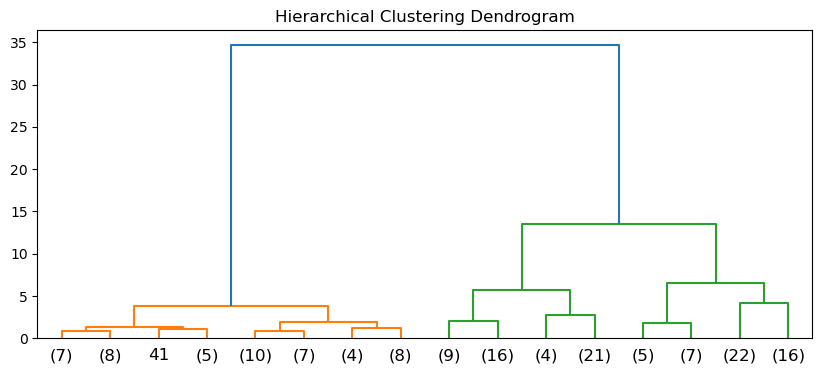

In [56]:
# Plot the dendrogram
plt.figure(figsize=(10, 4))
dendrogram(Z, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### 1.5):

In [58]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3)
y_hc = hc.fit_predict(X)

# Compare K-Means and Hierarchical Clustering using Silhouette Score
kmeans_score = silhouette_score(X, y_kmeans)
hc_score = silhouette_score(X, y_hc)

print(f'Silhouette Score for K-Means: {kmeans_score:.2f}')
print(f'Silhouette Score for Hierarchical Clustering: {hc_score:.2f}')


Silhouette Score for K-Means: 0.31
Silhouette Score for Hierarchical Clustering: 0.55
